# Лабораторная работа 4

## Правильный многоугольник Рело. Векторизация вычислений в numpy

## Кандидатов Егор Олегович, 28.03.2025

## Задание 4.1. Построение треугольника Рело

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [7]:
n = 3 # количество вершин треугольника Рело
center = np.array([0,0]) # координаты центра треугольника Рело
r = 10. # ширина треугольника Рело
N = 100 # количество точек для описания одной стороны треугольника Рело

In [9]:
l=r
R = l/(2*np.sin(np.pi/n))

In [11]:
t = np.arange(0,2*np.pi,2*np.pi/n)
vertices = center + R*np.transpose([np.cos(t), np.sin(t)])
vertices

array([[ 5.77350269,  0.        ],
       [-2.88675135,  5.        ],
       [-2.88675135, -5.        ]])

In [13]:
vertices[0,0], vertices[0,:], vertices[:,1]

(5.773502691896258, array([5.77350269, 0.        ]), array([ 0.,  5., -5.]))

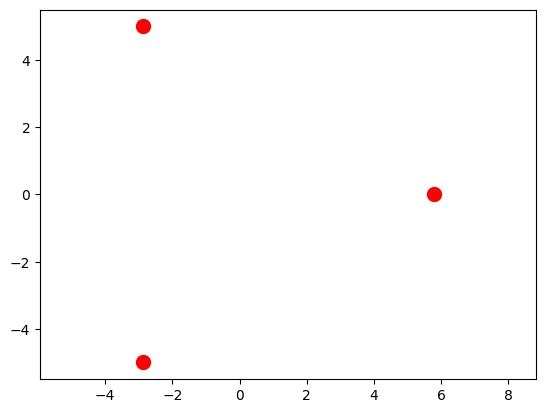

In [15]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.axis('equal');

## Этап 2. Представление одной стороны треугольника Рело

In [18]:
alpha = 2*np.pi/n
beta = alpha/2

In [20]:
angle = np.linspace(-beta/2, beta/2, N)

In [22]:
side0 = vertices[0] + r*np.transpose([np.cos(angle + np.pi),
 np.sin(angle + np.pi)])

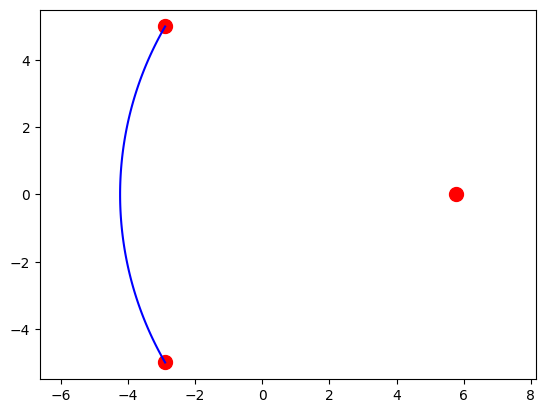

In [24]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.axis('equal');

In [26]:
side1 = vertices[1] + r*np.transpose([np.cos(angle + np.pi + alpha),
 np.sin(angle + np.pi + alpha)])

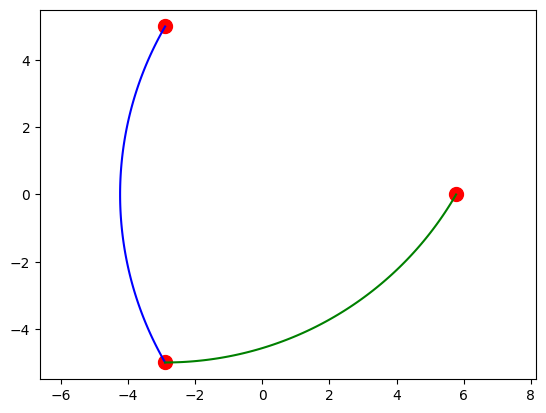

In [28]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.plot(side1[:,0],side1[:,1],'g-',markersize=20)
plt.axis('equal');

## Этап 3. Моделирование границы треугольника Рело

In [31]:
list_sides = [vertices[i] +
 r*np.transpose([np.cos(angle + np.pi + i*alpha),
 np.sin(angle + np.pi + i*alpha)])
 for i in range(n)]

In [33]:
sides = np.concatenate(list_sides)

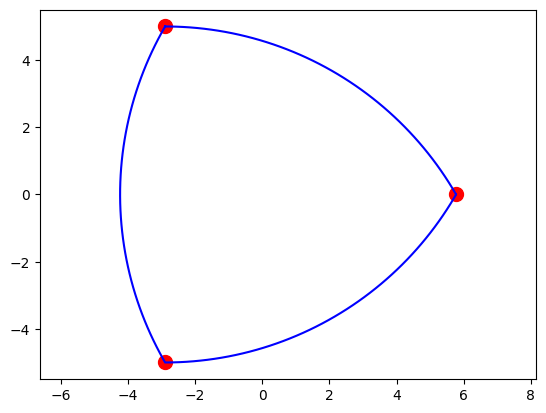

In [35]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(sides[:,0],sides[:,1],'b-',markersize=20)
plt.axis('equal');

## Задание 4.2. Построение правильного многоугольника Рело

In [38]:
t = np.arange(0,2*np.pi,2*np.pi/n)
vertices = center + R*np.transpose([np.cos(t), np.sin(t)])

In [40]:
alpha = 2*np.pi/n
beta = alpha/2

In [42]:
sides = np.concatenate([vertices[i] +
 r*np.transpose([np.cos(angle + np.pi + i*alpha),
 np.sin(angle + np.pi + i*alpha)])
 for i in range(n)])

In [44]:
l=math.sqrt(2*r*r*(1-math.cos(beta)))

In [46]:
R = l/(2*np.sin(np.pi/n))

## Задание 4.3. Результирующая пользовательская функция

In [49]:
def regular_polygon_Relo(n=3, center=np.array([0, 0]), r=1, N=100):
    assert isinstance(n, int) and n > 2 and n % 2 == 1, "n должно быть нечётным целым числом больше 2"
    assert isinstance(center, np.ndarray) and center.shape == (2,), "center должен быть массивом из 2 элементов"
    assert isinstance(r, (int, float)) and r > 0, "r должно быть положительным числом"
    assert isinstance(N, int) and N > 0, "N должно быть натуральным числом"
    alpha = 2*np.pi/n
    beta = alpha/2
    angle = np.linspace(-beta/2, beta/2, N)
    l=math.sqrt(2*r*r*(1-math.cos(beta)))
    R = l/(2*np.sin(np.pi/n))
    t = np.arange(0,2*np.pi,2*np.pi/n)
    vertices = center + R*np.transpose([np.cos(t), np.sin(t)])
    sides = np.concatenate([vertices[i] +
     r*np.transpose([np.cos(angle + np.pi + i*alpha),
     np.sin(angle + np.pi + i*alpha)])
     for i in range(n)])
    return sides

## Задание 4.4. Тестирование функции

In [52]:
import relo
import numpy as np
import matplotlib.pyplot as plt
import math

In [54]:
relo.regular_polygon_Relo(n=2)

AssertionError: n должно быть нечётным целым числом больше 2

In [56]:
center1 = np.array([0, 0])
relo.regular_polygon_Relo(center=center1)

array([[-2.88675135e-01,  5.00000000e-01],
       [-2.93915464e-01,  4.90811596e-01],
       [-2.99058309e-01,  4.81568276e-01],
       [-3.04103094e-01,  4.72271075e-01],
       [-3.09049256e-01,  4.62921032e-01],
       [-3.13896240e-01,  4.53519194e-01],
       [-3.18643505e-01,  4.44066613e-01],
       [-3.23290519e-01,  4.34564346e-01],
       [-3.27836762e-01,  4.25013456e-01],
       [-3.32281726e-01,  4.15415013e-01],
       [-3.36624913e-01,  4.05770090e-01],
       [-3.40865838e-01,  3.96079766e-01],
       [-3.45004025e-01,  3.86345126e-01],
       [-3.49039012e-01,  3.76567258e-01],
       [-3.52970347e-01,  3.66747257e-01],
       [-3.56797591e-01,  3.56886222e-01],
       [-3.60520315e-01,  3.46985255e-01],
       [-3.64138103e-01,  3.37045465e-01],
       [-3.67650550e-01,  3.27067963e-01],
       [-3.71057262e-01,  3.17053867e-01],
       [-3.74357859e-01,  3.07004296e-01],
       [-3.77551972e-01,  2.96920375e-01],
       [-3.80639243e-01,  2.86803233e-01],
       [-3.

In [58]:
relo.regular_polygon_Relo(n=6)

AssertionError: n должно быть нечётным целым числом больше 2

In [60]:
relo.regular_polygon_Relo(r=-1)

AssertionError: r должно быть положительным числом

In [62]:
relo.regular_polygon_Relo(N=3.2)

AssertionError: N должно быть натуральным числом

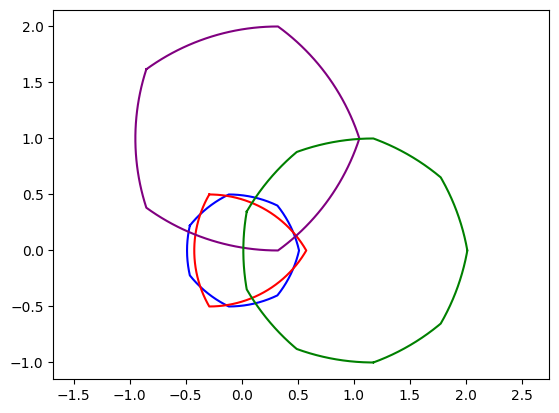

In [64]:
plt.figure()
ax=plt.axes()
sides1 = relo.regular_polygon_Relo(7, np.array([0, 0]), 1, 100)
ax.plot(sides1[:, 0], sides1[:, 1],'b-',markersize=20)
sides2 = relo.regular_polygon_Relo()
ax.plot(sides2[:, 0], sides2[:, 1],'r-',markersize=20)
sides3 = relo.regular_polygon_Relo(n=5, center=np.array([0, 1]), r=2, N=70)
ax.plot(sides3[:, 0], sides3[:, 1],'purple',markersize=20)
sides4 = relo.regular_polygon_Relo(9, np.array([1, 0]), N=150, r=2)
ax.plot(sides4[:, 0], sides4[:, 1],'green',markersize=20)
plt.axis('equal');